In [1]:
import sys
sys.path.insert(0, "/home/jbrown/Documents/Coding/tddft-inversion-release/python")
import TDDFTinversion as td
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np1=121 #number of grid points for 1-dimension
#initialize systemparameters derived type
sysparams=td.derivedtypes.init_systemparameters(np1)
sysparams.np1=np1 #number of grid points for 1-dimension
sysparams.nd=1 #number of dimensions
sysparams.npart=2 #number of particles
sysparams.xmin=-14.5 #minimum grid point
sysparams.xmax=14.5 #maximum grid point
sysparams.ct=0. #starting time
sysparams.dth=0.005 #goal time step
sysparams.dvksmax=100000 #max derivative of density with respect to time
sysparams.pinv0minresqlp1=0 #pseudoinverse set to 0, minresqlp set to 1
sysparams.quantization=1 #Quantization
sysparams.energy=5. #Energy of KS system, this can if desired
sysparams.occupy_case=0
sysparams.triplet=1
td.derivedtypes.fill_systemparameters(sysparams)
td.keomod.buildkeo(sysparams) #build kinetic energy operator and lattice values

sysparams2=td.derivedtypes.init_systemparameters(np1)
sysparams2.np1=np1 #number of grid points for 1-dimension
sysparams2.nd=1 #number of dimensions
sysparams2.npart=2 #number of particles
sysparams2.xmin=-13.5 #minimum grid point
sysparams2.xmax=13.5 #maximum grid point
sysparams2.ct=0. #starting time
sysparams2.dth=0.005 #goal time step
sysparams2.dvksmax=100000 #max derivative of density with respect to time
sysparams2.pinv0minresqlp1=0 #pseudoinverse set to 0, minresqlp set to 1
sysparams2.quantization=1 #Quantization
sysparams2.energy=5. #Energy of KS system, this can if desired
sysparams2.occupy_case=1
sysparams2.triplet=1
td.derivedtypes.fill_systemparameters(sysparams2)
td.keomod.buildkeo(sysparams2) #build kinetic energy operator and lattice values

sysparams3=td.derivedtypes.init_systemparameters(np1)
sysparams3.np1=np1 #number of grid points for 1-dimension
sysparams3.nd=1 #number of dimensions
sysparams3.npart=2 #number of particles
sysparams3.xmin=-13.5 #minimum grid point
sysparams3.xmax=13.5 #maximum grid point
sysparams3.ct=0. #starting time
sysparams3.dth=0.005 #goal time step
sysparams3.dvksmax=100000 #max derivative of density with respect to time
sysparams3.pinv0minresqlp1=0 #pseudoinverse set to 0, minresqlp set to 1
sysparams3.quantization=1 #Quantization
sysparams3.energy=5. #Energy of KS system, this can if desired
sysparams3.occupy_case=2
sysparams3.triplet=1
td.derivedtypes.fill_systemparameters(sysparams3)
td.keomod.buildkeo(sysparams3) #build kinetic energy operator and lattice values

sysparams4=td.derivedtypes.init_systemparameters(np1)
sysparams4.np1=np1 #number of grid points for 1-dimension
sysparams4.nd=1 #number of dimensions
sysparams4.npart=2 #number of particles
sysparams4.xmin=-13.5 #minimum grid point
sysparams4.xmax=13.5 #maximum grid point
sysparams4.ct=0. #starting time
sysparams4.dth=0.005 #goal time step
sysparams4.dvksmax=100000 #max derivative of density with respect to time
sysparams4.pinv0minresqlp1=0 #pseudoinverse set to 0, minresqlp set to 1
sysparams4.quantization=1 #Quantization
sysparams4.energy=5. #Energy of KS system, this can if desired
sysparams4.occupy_case=3
sysparams4.triplet=1
td.derivedtypes.fill_systemparameters(sysparams4)
td.keomod.buildkeo(sysparams4) #build kinetic energy operator and lattice values

In [3]:
#generate derived type to store 1 and 2 body potentials
sharedvals=td.derivedtypes.init_sharedvalues(sysparams) #shared values derived type
#generate potentials, can write own program
td.potential.generate_1bodypot(sysparams,sharedvals)
td.potential.generate_2bodypot(sysparams,sharedvals)

#derived type that stores full wavefunction and potential
fullvals=td.derivedtypes.init_fullvalues(sysparams)
td.potential.generate_nbodypot(sysparams,sharedvals,fullvals)
td.initial_states.initializefullsystem(sysparams,fullvals)

In [4]:

#next 5 are required to develop and advance KS orbitals
dpe=np.zeros(sysparams.ntot1,dtype=np.float64) #current density
dnx=np.zeros(sysparams.ntot1,dtype=np.float64) #current derivative of density
ddnx=np.zeros(sysparams.ntot1,dtype=np.float64) #second derivative of density
dpenew=np.zeros(sysparams.ntot1,dtype=np.float64) #density after time step dt, taken from sysparams.dt
ddnxnew=np.zeros(sysparams.ntot1,dtype=np.float64) #second derivative of density after time step sysparams.dt

#placeholder for advancing full system
psinew=np.zeros(sysparams.ntot,dtype=np.complex128)

In [5]:
td.density.fullwf_density(sysparams,fullvals.psi,dpe)


In [6]:
#initialize KS orbitals system to match dpe
KSvals=td.initial_states.initializekssystem(sysparams,sharedvals,dpe,fullvals)

In [7]:
KSvals2=td.initial_states.initializekssystem(sysparams2,sharedvals,dpe,fullvals)

In [8]:
KSvals3=td.initial_states.initializekssystem(sysparams3,sharedvals,dpe,fullvals)

In [9]:
KSvals4=td.initial_states.initializekssystem(sysparams4,sharedvals,dpe,fullvals)

In [10]:
#add driving potential for example 2
if (sysparams.npart==2):
    td.potential.add_driving_potential(sysparams,sharedvals,fullvals)

In [11]:
sysparams.dt=sysparams.dth/2
sysparams2.dt=sysparams2.dth/2
sysparams3.dt=sysparams3.dth/2
sysparams4.dt=sysparams4.dth/2

In [12]:
rwave=np.zeros((4560,sysparams.npart,sysparams.ntot1),dtype=np.float64)
iwave=np.zeros((4560,sysparams.npart,sysparams.ntot1),dtype=np.float64)
densities=np.zeros((4560,sysparams.ntot1),dtype=np.float64)
ddensities=np.zeros((4560,sysparams.ntot1),dtype=np.float64)
dddensities=np.zeros((4560,sysparams.ntot1),dtype=np.float64)
potentials=np.zeros((4560,sysparams.ntot1),dtype=np.float64)

In [13]:
for loop in range(1141):
    if (np.remainder(loop,50)==0):
        print('\n')
        print('For time '+str(sysparams.ct)+' to ',str(sysparams.ct+sysparams.dt))
    
    # generate wavefunction at ct+dt
    td.propagate.advancewf(sysparams,sharedvals,25,fullvals.v,fullvals.psi,psinew)
    
    #Calculate density, first derivative of density and second derivative of density 
    #at time ct using psi
    td.density.fullwf_density(sysparams,fullvals.psi,dpe)
    td.density.calcdnx(sysparams,sharedvals,sysparams.ntot1,fullvals.psi,fullvals.v,dnx)
    td.density.calcddnx(sysparams,sharedvals,sysparams.ntot1,fullvals.psi,fullvals.v,ddnx)
    
    #Calculate density and second derivative of density at time ct+dt using psinew
    td.density.fullwf_density(sysparams,psinew,dpenew)
    td.density.calcddnx(sysparams,sharedvals,sysparams.ntot1,psinew,fullvals.v,ddnxnew)
    
    
    
    #Attempt to advance KS system
    info=td.ksadvance_mod.advancekssystem(dpe,dpenew,dnx,ddnx,ddnxnew,sysparams,KSvals,sharedvals)
    info2=td.ksadvance_mod.advancekssystem(dpe,dpenew,dnx,ddnx,ddnxnew,sysparams2,KSvals2,sharedvals)
    info2=td.ksadvance_mod.advancekssystem(dpe,dpenew,dnx,ddnx,ddnxnew,sysparams3,KSvals3,sharedvals)
    info2=td.ksadvance_mod.advancekssystem(dpe,dpenew,dnx,ddnx,ddnxnew,sysparams4,KSvals4,sharedvals)
    
    if (info==1):#succesful advance of orbitals shift full wavefunction
        fullvals.psi=psinew

    if (loop>0): 
        rwave[loop-1]=np.real(np.transpose(KSvals.phi))
        iwave[loop-1]=np.imag(np.transpose(KSvals.phi))
        dddensities[loop-1]=ddnxnew
        densities[loop-1]=dpenew
        potentials[loop-1]=KSvals.vks-sharedvals.v1
        td.density.calcdnx(sysparams,sharedvals,sysparams.ntot1,psinew,fullvals.v,dnx)
        ddensities[loop-1]=dnx
        rwave[1140+loop-1]=np.real(np.transpose(KSvals2.phi))
        iwave[1140+loop-1]=np.imag(np.transpose(KSvals2.phi))
        dddensities[1140+loop-1]=ddnxnew
        densities[1140+loop-1]=dpenew
        potentials[1140+loop-1]=KSvals2.vks-sharedvals.v1
        td.density.calcdnx(sysparams,sharedvals,sysparams.ntot1,psinew,fullvals.v,dnx)
        ddensities[1140+loop-1]=dnx
        rwave[2280+loop-1]=np.real(np.transpose(KSvals3.phi))
        iwave[2280+loop-1]=np.imag(np.transpose(KSvals3.phi))
        dddensities[2280+loop-1]=ddnxnew
        densities[2280+loop-1]=dpenew
        potentials[2280+loop-1]=KSvals3.vks-sharedvals.v1
        td.density.calcdnx(sysparams3,sharedvals,sysparams3.ntot1,psinew,fullvals.v,dnx)
        ddensities[2280+loop-1]=dnx
        rwave[3420+loop-1]=np.real(np.transpose(KSvals4.phi))
        iwave[3420+loop-1]=np.imag(np.transpose(KSvals4.phi))
        dddensities[3420+loop-1]=ddnxnew
        densities[3420+loop-1]=dpenew
        potentials[3420+loop-1]=KSvals4.vks-sharedvals.v1
        td.density.calcdnx(sysparams4,sharedvals,sysparams4.ntot1,psinew,fullvals.v,dnx)
        ddensities[3420+loop-1]=dnx



For time 0.0 to  0.0025


For time 0.24000000000000013 to  0.24500000000000013


For time 0.4900000000000003 to  0.49500000000000033


For time 0.7400000000000005 to  0.7450000000000006


For time 0.9900000000000008 to  0.9950000000000008


For time 1.2399999999999956 to  1.2449999999999954


For time 1.4899999999999902 to  1.4949999999999901


For time 1.739999999999985 to  1.7449999999999848


For time 1.9899999999999796 to  1.9949999999999795


For time 2.2399999999999745 to  2.2449999999999743


For time 2.489999999999969 to  2.494999999999969


For time 2.739999999999964 to  2.7449999999999637


For time 2.9899999999999585 to  2.9949999999999584


For time 3.239999999999953 to  3.244999999999953


For time 3.489999999999948 to  3.4949999999999477


For time 3.7399999999999425 to  3.7449999999999424


For time 3.989999999999937 to  3.994999999999937


For time 4.239999999999932 to  4.244999999999932


For time 4.4899999999999265 to  4.494999999999926


For time 4.739999999999921 

In [195]:
cfulldata=np.zeros((4560,15,sysparams.ntot1),dtype=np.float64)

In [160]:
trwave=np.zeros((4560,sysparams.npart,sysparams.ntot1),dtype=np.float64)
tiwave=np.zeros((4560,sysparams.npart,sysparams.ntot1),dtype=np.float64)
ttrwave=np.zeros((4560,sysparams.npart,sysparams.ntot1),dtype=np.float64)
ttiwave=np.zeros((4560,sysparams.npart,sysparams.ntot1),dtype=np.float64)
for i in range(4560):
    trwave[i][0]=np.matmul(sysparams.t,rwave[i][0])
    tiwave[i][0]=np.matmul(sysparams.t,iwave[i][0])
    trwave[i][1]=np.matmul(sysparams.t,rwave[i][1])
    tiwave[i][1]=np.matmul(sysparams.t,iwave[i][1])
    ttrwave[i][0]=np.matmul(sysparams.t,trwave[i][0])
    ttiwave[i][0]=np.matmul(sysparams.t,tiwave[i][0])
    ttrwave[i][1]=np.matmul(sysparams.t,trwave[i][1])
    ttiwave[i][1]=np.matmul(sysparams.t,tiwave[i][1])

In [196]:
for i in range(4560):
    cfulldata[i][0]=dddensities[i]
    cfulldata[i][1]=rwave[i][0]
    cfulldata[i][2]=iwave[i][0]
    cfulldata[i][3]=rwave[i][1]
    cfulldata[i][4]=iwave[i][1]
    cfulldata[i][5]=trwave[i][0]
    cfulldata[i][6]=tiwave[i][0]
    cfulldata[i][7]=trwave[i][1]
    cfulldata[i][8]=tiwave[i][1]
    cfulldata[i][9]=ttrwave[i][0]
    cfulldata[i][10]=ttiwave[i][0]
    cfulldata[i][11]=ttrwave[i][1]
    cfulldata[i][12]=ttiwave[i][1]
    cfulldata[i][13]=ddensities[i]
    cfulldata[i][14]=densities[i]
ccfulldata=np.transpose(cfulldata,(0,2,1))

In [197]:
traindata=np.zeros((4000,sysparams.ntot1,15),dtype=np.float32)
testdata=np.zeros((560,sysparams.ntot1,15),dtype=np.float32)
traindata[0:1000]=ccfulldata[:1000]
traindata[1000:2000]=ccfulldata[1140:2140]
traindata[2000:3000]=ccfulldata[2280:3280]
traindata[3000:4000]=ccfulldata[3420:4420]
testdata[0:140]=ccfulldata[1000:1140]
testdata[140:280]=ccfulldata[2140:2280]
testdata[280:420]=ccfulldata[3280:3420]
testdata[420:560]=ccfulldata[4420:4560]

In [233]:
trainlabels=np.zeros((4000,sysparams.ntot1),dtype=np.float32)
testlabels=np.zeros((560,sysparams.ntot1),dtype=np.float32)
f=0
trainlabels[0:1000]=potentials[:1000]
trainlabels[1000:2000]=potentials[1140:2140]
trainlabels[2000:3000]=potentials[2280:3280]
trainlabels[3000:4000]=potentials[3420:4420]
testlabels[0:140]=potentials[1000:1140]
testlabels[140:280]=potentials[2140:2280]
testlabels[280:420]=potentials[3280:3420]
testlabels[420:560]=potentials[4420:4560]

print(trainlabels[950]-trainlabels[1])

[-0.00614834 -0.00618696 -0.00621009 -0.00623465 -0.0062604  -0.00628686
 -0.00631404 -0.00634193 -0.00637126 -0.00640106 -0.00643229 -0.006464
 -0.00649738 -0.00653172 -0.00656724 -0.00660396 -0.0066421  -0.00668168
 -0.00672269 -0.00676537 -0.00680947 -0.00685525 -0.00690293 -0.00695229
 -0.00700402 -0.00705743 -0.00711346 -0.00717139 -0.00723195 -0.00729513
 -0.00736094 -0.00742984 -0.0075016  -0.0075767  -0.00765538 -0.0077374
 -0.00782371 -0.00791383 -0.00800848 -0.0081079  -0.00821233 -0.00832224
 -0.00843763 -0.00855923 -0.00868773 -0.00882268 -0.00896573 -0.00911665
 -0.00927615 -0.00944471 -0.00962257 -0.00980878 -0.01000142 -0.01019764
 -0.01039982 -0.01063704 -0.01103306 -0.01196361 -0.01418829 -0.01779079
 -0.01879311 -0.01285791 -0.00348592  0.00608373  0.01488924  0.01882362
  0.01662898  0.01341224  0.01173663  0.01110506  0.01081061  0.01058316
  0.01036358  0.01014733  0.00993943  0.00974107  0.00955176  0.00937152
  0.00919962  0.0090363   0.00888109  0.00873423  0.00

In [226]:
import tensorflow as tf

In [463]:
inputs=tf.keras.Input(shape=(sysparams.ntot1,15))
dense=tf.keras.layers.Conv1D(6,3,activation="linear")
x=dense(inputs)
#x=tf.keras.layers.MaxPooling1D((2))(x)
#x=tf.keras.layers.Conv1D(3,3,activation="tanh")(x)
x=tf.keras.layers.MaxPooling1D((6))(x)
x= tf.keras.layers.Flatten()(x)
x = tf.keras.layers.BatchNormalization()(x)
#x = tf.keras.layers.Dense(121, activation="relu")(x)
x = tf.keras.layers.Dense(121,kernel_initializer='lecun_normal',activation='selu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.05)(x)
x = tf.keras.layers.Dense(121, kernel_initializer='lecun_normal',activation='selu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.05)(x)
x = tf.keras.layers.Dense(121,kernel_initializer='lecun_normal',activation='selu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.05)(x)
x = tf.keras.layers.Dense(121, activation="tanh")(x)
outputs=tf.keras.layers.Dense(sysparams.ntot1,activation="linear")(x)
mlp=tf.keras.Model(inputs,outputs)
mlp.summary()

Model: "functional_107"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_55 (InputLayer)        [(None, 121, 15)]         0         
_________________________________________________________________
conv1d_55 (Conv1D)           (None, 119, 6)            276       
_________________________________________________________________
average_pooling1d_32 (Averag (None, 19, 6)             0         
_________________________________________________________________
flatten_54 (Flatten)         (None, 114)               0         
_________________________________________________________________
batch_normalization_174 (Bat (None, 114)               456       
_________________________________________________________________
dense_277 (Dense)            (None, 121)               13915     
_________________________________________________________________
batch_normalization_175 (Bat (None, 121)            

In [464]:
mlp.compile(optimizer='Adam',
              loss='MeanAbsoluteError')

In [465]:
#mlp.fit(fulldata[:1000], trainlabels-3.83, epochs=400)
mlp.fit(traindata, trainlabels-3.83, epochs=200)

Epoch 1/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5764
Epoch 2/200
125/125 [==============================] - 0s 1ms/step - loss: 0.3783
Epoch 3/200
125/125 [==============================] - 0s 1ms/step - loss: 0.3352
Epoch 4/200
125/125 [==============================] - 0s 2ms/step - loss: 0.3084
Epoch 5/200
125/125 [==============================] - 0s 2ms/step - loss: 0.2920
Epoch 6/200
125/125 [==============================] - 0s 1ms/step - loss: 0.2744
Epoch 7/200
125/125 [==============================] - 0s 1ms/step - loss: 0.2533
Epoch 8/200
125/125 [==============================] - 0s 1ms/step - loss: 0.2383
Epoch 9/200
125/125 [==============================] - 0s 1ms/step - loss: 0.2178
Epoch 10/200
125/125 [==============================] - 0s 1ms/step - loss: 0.2035
Epoch 11/200
125/125 [==============================] - 0s 1ms/step - loss: 0.1946
Epoch 12/200
125/125 [==============================] - 0s 1ms/step - loss: 0.1770
Epoch 13/200


125/125 [==============================] - 0s 2ms/step - loss: 0.0415
Epoch 100/200
125/125 [==============================] - 0s 2ms/step - loss: 0.0413
Epoch 101/200
125/125 [==============================] - 0s 1ms/step - loss: 0.0391
Epoch 102/200
125/125 [==============================] - 0s 1ms/step - loss: 0.0408
Epoch 103/200
125/125 [==============================] - 0s 2ms/step - loss: 0.0385
Epoch 104/200
125/125 [==============================] - 0s 2ms/step - loss: 0.0391
Epoch 105/200
125/125 [==============================] - 0s 2ms/step - loss: 0.0384
Epoch 106/200
125/125 [==============================] - 0s 2ms/step - loss: 0.0380
Epoch 107/200
125/125 [==============================] - 0s 2ms/step - loss: 0.0405
Epoch 108/200
125/125 [==============================] - 0s 1ms/step - loss: 0.0367
Epoch 109/200
125/125 [==============================] - 0s 1ms/step - loss: 0.0357
Epoch 110/200
125/125 [==============================] - 0s 2ms/step - loss: 0.0389
Epoch 

125/125 [==============================] - 0s 1ms/step - loss: 0.0303
Epoch 197/200
125/125 [==============================] - 0s 1ms/step - loss: 0.0338
Epoch 198/200
125/125 [==============================] - 0s 2ms/step - loss: 0.0320
Epoch 199/200
125/125 [==============================] - 0s 2ms/step - loss: 0.0320
Epoch 200/200
125/125 [==============================] - 0s 1ms/step - loss: 0.0314


In [466]:
np.transpose(mlp.layers[1].get_weights()[0])

array([[[ 0.31262028,  0.21308716, -0.3651203 ],
        [-0.26770315, -0.23114164,  0.17992994],
        [-0.06965987,  0.24401665,  0.2735909 ],
        [ 0.18166116,  0.14517789, -0.08533119],
        [-0.20773591, -0.33808416,  0.1821968 ],
        [ 0.11394414,  0.29671556, -0.09773853],
        [-0.00722523, -0.042914  , -0.1625474 ],
        [ 0.22064605,  0.34474137,  0.32334036],
        [ 0.47344002,  0.22370948, -0.01600242],
        [-0.02320762, -0.02842313,  0.36678457],
        [ 0.08509511,  0.13301946,  0.38018724],
        [-0.16721408, -0.3138105 , -0.28861392],
        [-0.28356874, -0.6267468 , -0.19979608],
        [-1.1305089 , -1.3030857 , -1.3318961 ],
        [-0.07428899, -0.2241385 ,  0.37801522]],

       [[-0.14820543, -0.1318919 , -0.12480668],
        [ 0.253121  , -0.12653202, -0.08371004],
        [ 0.06714852,  0.2847187 , -0.17142083],
        [-0.20083004, -0.3807297 ,  0.07277276],
        [-0.5442798 , -0.2863755 , -0.01294474],
        [ 0.083111

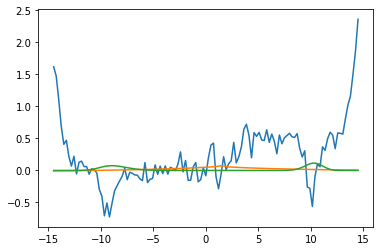

In [468]:
x=sysparams.xlattice
#v=mlp.predict(testdata)
v=mlp.predict(ccfulldata)
np.shape(v)
plt.plot(x,v[1111],x,potentials[1111]-3.83,x,densities[2200])